In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import scale
df=pd.read_csv("C:/Users/cregg/Downloads/preprocessed_data.csv")

In [2]:
np.shape(df)

(39774, 3140)

In [3]:
df.head()

,id,'n,(10,(14,(14.5,(15,(flour),(not,(powder),00,...,za'atar,zatarains,zatarain’s,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,10259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
features = ['cheese', 'rice', 'tortillas', 'chicken', 'salsa', 'beans']

x = df.loc[:, features].values

y = df.loc[:, ['id']].values

x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [6]:
targetDataframe = df[['id']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [7]:
newDataframe

,PC1,PC2,PC3,id
0,1.434381,-0.399614,1.996728,10259
1,-0.545641,-0.437857,0.286260,25693
2,-0.107169,1.690122,-2.058897,20130
3,-0.545641,-0.437857,0.286260,22213
4,-0.377592,0.377716,-0.612549,13162
...,...,...,...,...
39769,-0.545641,-0.437857,0.286260,29109
39770,-0.086435,-0.926461,-0.173379,11462
39771,-0.545641,-0.437857,0.286260,2238
39772,-0.665619,3.064008,-0.828867,41882


In [8]:
pca.explained_variance_ratio_

array([0.2604036 , 0.19321483, 0.160895  ])

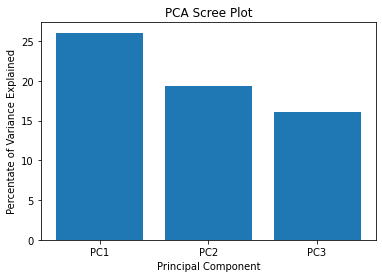

In [9]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']
plt.bar(x= range(1,4), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [10]:
newDataframe.max()

PC1       11.732689
PC2        7.532088
PC3        7.719919
id     49717.000000
dtype: float64

In [11]:
newDataframe.sort_values(by=['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3,id
29699,-1.846438,6.871174,1.383912,44076
23494,-1.762524,6.399671,1.313103,21333
26372,-1.681200,5.942721,1.244479,46714
9869,-1.597626,5.473128,1.173957,27927
8036,-1.573372,5.336852,1.153491,36602
...,...,...,...,...
28734,10.598184,0.699993,2.588256,13382
127,10.829297,0.723591,2.635997,7406
17925,11.049391,0.746064,2.681462,457
8927,11.251945,0.766746,2.723304,8641


Text(0, 0.5, 'PC3')

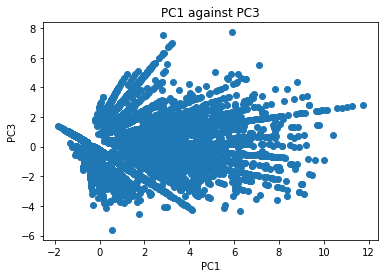

In [12]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC3)
plt.title('PC1 against PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')

Text(0, 0.5, 'PC3')

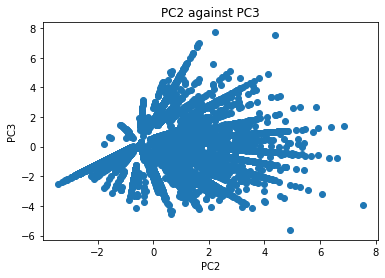

In [13]:
plt.scatter(principalDataframe.PC2, principalDataframe.PC3)
plt.title('PC2 against PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')